In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The DataOperations class is used to read in data, process data, and visualize data
class DataOperations:
   
    def __init__(self,atr=None):
        """
        The function prints the dataframe info and then the dataframe description
        
        :param atr: The attribute of the class
        """
        self.atr = atr

        if isinstance(self.atr,np.ndarray):
            self.df = pd.DataFrame(self.atr)
            
        elif isinstance(self.atr,str):
    
            if self.atr.endswith(".csv"):
                self.df = pd.read_csv(self.atr)
                
            elif self.atr.endswith(".json"):
                self.df = pd.read_json(self.atr)
                 
            else:
                raise ValueError("Invalid file type")  

        elif isinstance(self.atr,pd.DataFrame):
            self.df = self.atr

        elif type(self.atr==type(None)):
            new_rnd_data = {"a":np.random.randn(10),
                            "b":np.random.randn(10),
                            "c":np.random.randn(10)}

            self.df = pd.DataFrame(new_rnd_data,columns=new_rnd_data.keys())
         
    def descriptive_statistics(self):
        '''
        The function prints the dataframe info and then the dataframe description
        '''
        print(self.df.info())
        print("- "*30)
        print(self.df.describe().T)
         
    def visualization(self):
        '''
        This function is used to visualize the data
        '''
        flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
                  
        for col in self.df.columns:
            if self.df[col].dtypes != "O":
                fig,(ax1,ax2) = plt.subplots(figsize=(12,6),ncols=2)
                ax1.hist(self.df[col],facecolor="g", alpha=0.75)
                ax1.set_title(f"Histogram of {col}")
                ax1.grid(True)

                ax2.boxplot(x=self.df[col],notch=True,flierprops=flierprops)
                ax2.set_title(f"Boxplot of {col}")
                
        plt.show()

### With numpy.array

In [3]:
op_1 = DataOperations(np.random.randn(10))
op_1.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
   count     mean       std       min       25%       50%       75%       max
0   10.0 -0.78591  0.666048 -1.839302 -1.262592 -0.569543 -0.428102  0.100849


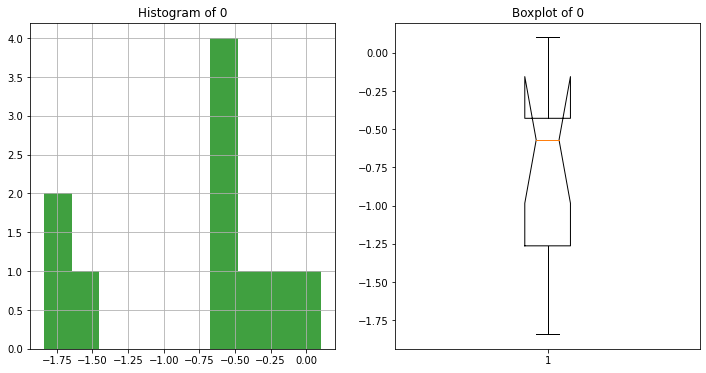

In [4]:
op_1.visualization()

### With path

In [5]:
op_2 = DataOperations("C:/Users/emirh/OneDrive/Belgeler/trial_dataset.csv")
op_2.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


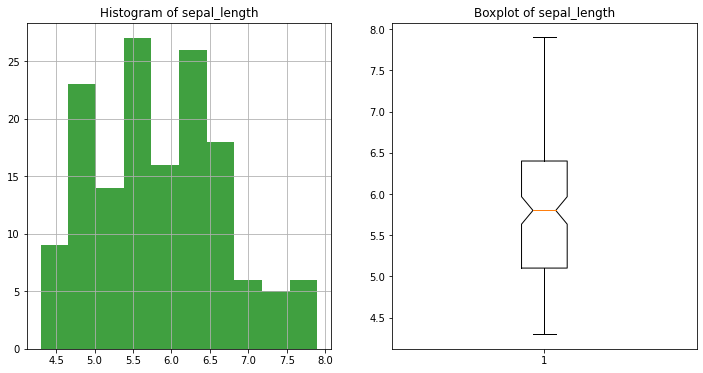

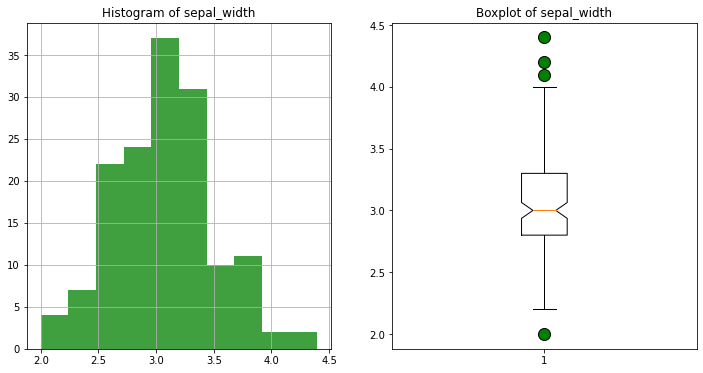

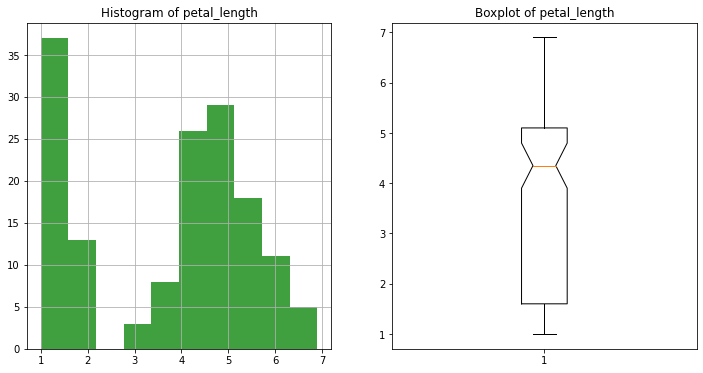

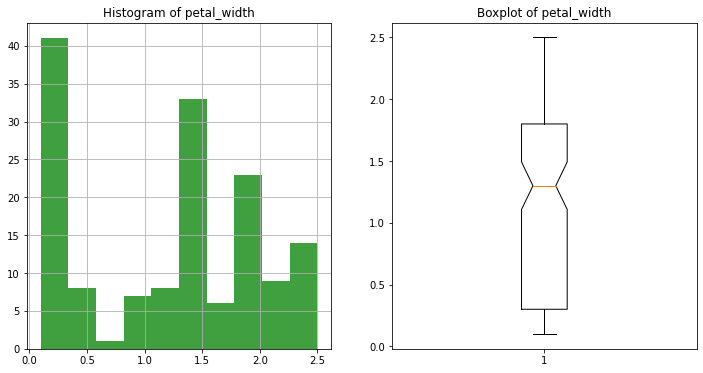

In [6]:
op_2.visualization()

### With Dataframe

In [7]:
df_1 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

In [8]:
op_3 = DataOperations(df_1)
op_3.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int32
 1   b       3 non-null      int32
 2   c       3 non-null      int32
dtypes: int32(3)
memory usage: 164.0 bytes
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
   count  mean  std  min  25%  50%  75%  max
a    3.0   4.0  3.0  1.0  2.5  4.0  5.5  7.0
b    3.0   5.0  3.0  2.0  3.5  5.0  6.5  8.0
c    3.0   6.0  3.0  3.0  4.5  6.0  7.5  9.0


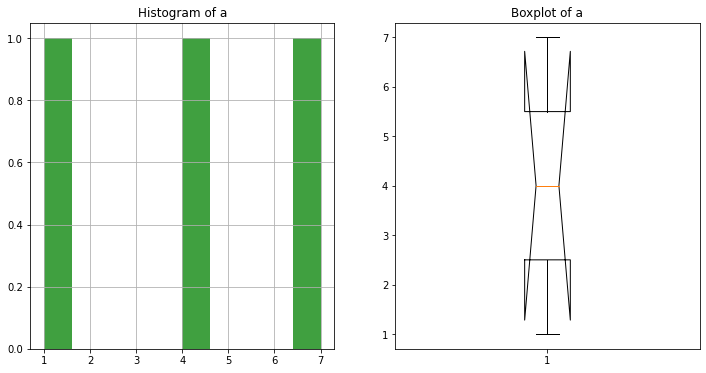

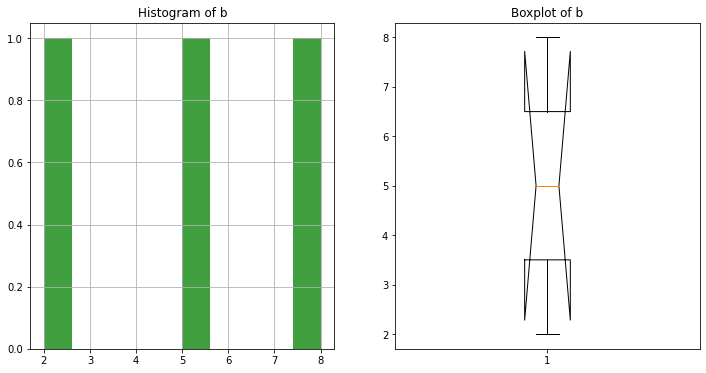

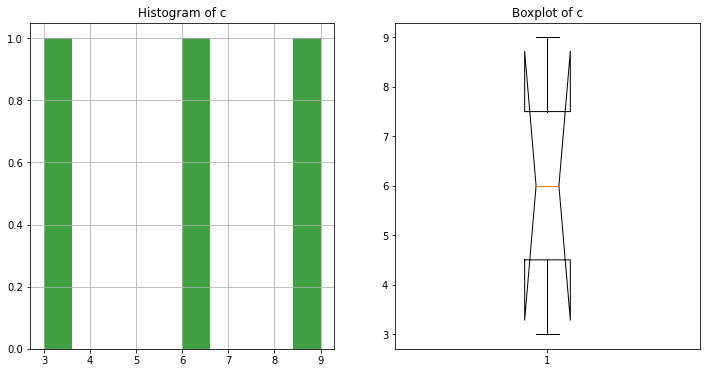

In [9]:
op_3.visualization()

### With (Not given)

In [10]:
op_4 = DataOperations()
op_4.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     float64
 1   b       10 non-null     float64
 2   c       10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
   count      mean       std       min       25%       50%       75%       max
a   10.0  0.310578  0.855803 -0.959225 -0.136540  0.336393  0.784507  1.542120
b   10.0  0.335992  1.056886 -1.505603 -0.088427  0.083517  1.264560  1.728178
c   10.0 -0.585613  0.379313 -1.200376 -0.901550 -0.457759 -0.357255 -0.028345


In [11]:
op_4.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     float64
 1   b       10 non-null     float64
 2   c       10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
   count      mean       std       min       25%       50%       75%       max
a   10.0  0.310578  0.855803 -0.959225 -0.136540  0.336393  0.784507  1.542120
b   10.0  0.335992  1.056886 -1.505603 -0.088427  0.083517  1.264560  1.728178
c   10.0 -0.585613  0.379313 -1.200376 -0.901550 -0.457759 -0.357255 -0.028345


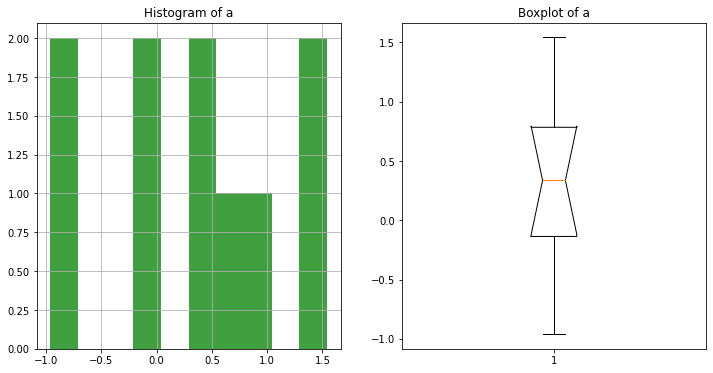

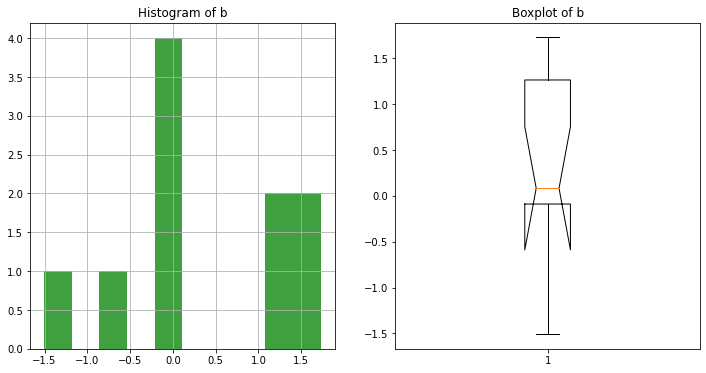

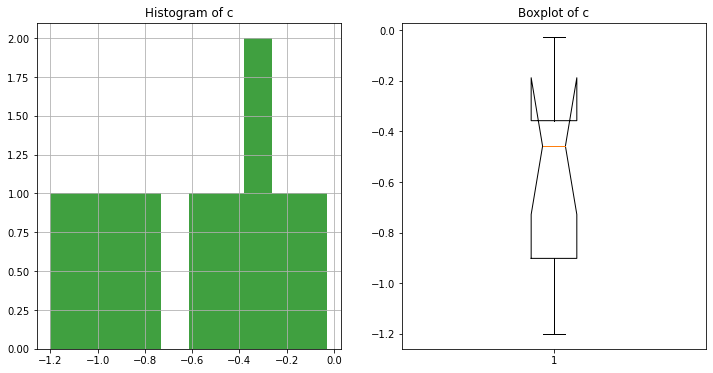

In [12]:
op_4.visualization()